# Projet Machine learning

Aujourd'hui, en formule 1 comme ailleurs, les données sont des éléments indispensables pour le développement. En formule 1, une voiture peut avoir jusqu'à 120 capteurs en tous genre et générer 3 Go de données chaque seconde. Ces multitudes de données permettent aux écuries de plus facilement s'améliorer. A travers différents graphes, nous allons les enjeu des données en formule 1.

<br>
Nous allons pour cela prendre l'exemple de l'écurie "Renault F1".

## Import des librairies

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np

import scipy
import time

## Dataset import

Base CSV :
https://ergast.com/mrd/

In [61]:
## encoding UTF-8 is not real UTF-8
circuits = pd.read_csv('data/F1_data_2009-2016/circuits.csv', encoding = "ISO-8859-1", engine='python')
constructorResults = pd.read_csv('data/F1_data_2009-2016/constructorResults.csv', encoding = "ISO-8859-1", engine='python') 
constructors = pd.read_csv('data/F1_data_2009-2016/constructors.csv', encoding = "ISO-8859-1", engine='python') 
constructorStandings = pd.read_csv('data/F1_data_2009-2016/constructorStandings.csv', encoding = "ISO-8859-1", engine='python') 
drivers = pd.read_csv('data/F1_data_2009-2016/drivers.csv', encoding = "ISO-8859-1", engine='python') 
driverStandings = pd.read_csv('data/F1_data_2009-2016/driverStandings.csv', encoding = "ISO-8859-1", engine='python')
lapTimes = pd.read_csv('data/F1_data_2009-2016/lapTimes.csv', encoding = "ISO-8859-1", engine='python') 
pitStops = pd.read_csv('data/F1_data_2009-2016/pitStops.csv', encoding = "ISO-8859-1", engine='python') 
qualifying = pd.read_csv('data/F1_data_2009-2016/qualifying.csv')
races = pd.read_csv('data/F1_data_2009-2016/races.csv') 
results = pd.read_csv('data/F1_data_2009-2016/results.csv', encoding = "ISO-8859-1", engine='python')
seasons = pd.read_csv('data/F1_data_2009-2016/seasons.csv', encoding = "ISO-8859-1", engine='python') 
status = pd.read_csv('data/F1_data_2009-2016/status.csv', encoding = "ISO-8859-1", engine='python')

In [63]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,NaN,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,NaN,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÌ_,Spain,41.57000,2.26111,NaN,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,NaN,http://en.wikipedia.org/wiki/Istanbul_Park


In [64]:
constructorResults.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,NaN
1,2,18,2,8.0,NaN
2,3,18,3,9.0,NaN
3,4,18,4,5.0,NaN
4,5,18,5,2.0,NaN


In [65]:
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [66]:
constructorStandings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,Unnamed: 7
0,1,18,1,14.0,1,1,1,NaN
1,2,18,2,8.0,3,3,0,NaN
2,3,18,3,9.0,2,2,0,NaN
3,4,18,4,5.0,4,4,0,NaN
4,5,18,5,2.0,5,5,0,NaN


In [67]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [68]:
driverStandings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [69]:
lapTimes.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [70]:
pitStops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [18]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [19]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [20]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [21]:
seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [22]:
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


Base CSV : 
http://www.f1datajunkie.com/p/data.html

In [71]:
## Grand prix de Monaco essai libre
monaco_p1 = pd.read_csv('data/6_Monaco_data/p1.csv',sep=';')
monaco_p2 = pd.read_csv('data/6_Monaco_data/p2.csv',sep=';')
monaco_p3 = pd.read_csv('data/6_Monaco_data/p3.csv',sep=';')

## Grand prix du Canada essai libre
canada_p1 = pd.read_csv('data/7_Canada_data/p1.csv',sep=';')
canada_p2 = pd.read_csv('data/7_Canada_data/p2.csv',sep=';')
canada_p3 = pd.read_csv('data/7_Canada_data/p3.csv',sep=';')

## Grand prix d'Europe essai libre
europa_p1 = pd.read_csv('data/8_Europa_data/p1.csv',sep=';')
europa_p2 = pd.read_csv('data/8_Europa_data/p2.csv',sep=';')
europa_p3 = pd.read_csv('data/8_Europa_data/p3.csv',sep=';')

## Grand prix de Grande bretagne essai libre
great_britain_p1 = pd.read_csv('data/9_Great_britain_data/p1.csv',sep=';')
great_britain_p2 = pd.read_csv('data/9_Great_britain_data/p2.csv',sep=';')
great_britain_p3 = pd.read_csv('data/9_Great_britain_data/p3.csv',sep=';')

## Grand prix d'Allemagne essai libre
germany_p1 = pd.read_csv('data/10_Germany_data/p1.csv',sep=';')
germany_p2 = pd.read_csv('data/10_Germany_data/p2.csv',sep=';')
germany_p3 = pd.read_csv('data/10_Germany_data/p3.csv',sep=';')

## Grand prix d'Hongrie essai libre
hungary_p1 = pd.read_csv('data/11_Hungary_data/p1.csv',sep=';')
hungary_p2 = pd.read_csv('data/11_Hungary_data/p2.csv',sep=';')
hungary_p3 = pd.read_csv('data/11_Hungary_data/p3.csv',sep=';')

## Grand prix de Belgique essai libre
belgium_p1 = pd.read_csv('data/12_Belgium_data/p1.csv',sep=';')
belgium_p2 = pd.read_csv('data/12_Belgium_data/p2.csv',sep=';')
belgium_p3 = pd.read_csv('data/12_Belgium_data/p3.csv',sep=';')

## Grand prix de Italie essai libre
italia_p1 = pd.read_csv('data/13_Italia_data/p1.csv',sep=';')
italia_p2 = pd.read_csv('data/13_Italia_data/p2.csv',sep=';')
italia_p3 = pd.read_csv('data/13_Italia_data/p3.csv',sep=';')

## Traitement des datasets

In [72]:
## Grand prix de Monaco
monaco_p1["Time"] =  monaco_p1["Time"].str.replace(',','.').astype(float)
monaco_p2["Time"] =  monaco_p2["Time"].str.replace(',','.').astype(float)
monaco_p3["Time"] =  monaco_p3["Time"].str.replace(',','.').astype(float)

## Grand prix du Canada
canada_p1["Time"] =  canada_p1["Time"].str.replace(',','.').astype(float)
canada_p2["Time"] =  canada_p2["Time"].str.replace(',','.').astype(float)
canada_p3["Time"] =  canada_p3["Time"].str.replace(',','.').astype(float)

## Grand prix d'Europe
europa_p1["Time"] =  europa_p1["Time"].str.replace(',','.').astype(float)
europa_p2["Time"] =  europa_p2["Time"].str.replace(',','.').astype(float)
europa_p3["Time"] =  europa_p3["Time"].str.replace(',','.').astype(float)

## Grand prix de Grande bretagne
great_britain_p1["Time"] =  great_britain_p1["Time"].str.replace(',','.').astype(float)
great_britain_p2["Time"] =  great_britain_p2["Time"].str.replace(',','.').astype(float)
great_britain_p3["Time"] =  great_britain_p3["Time"].str.replace(',','.').astype(float)

## Grand prix d'Allemagne
germany_p1["Time"] =  germany_p1["Time"].str.replace(',','.').astype(float)
germany_p2["Time"] =  germany_p2["Time"].str.replace(',','.').astype(float)
germany_p3["Time"] =  germany_p3["Time"].str.replace(',','.').astype(float)

## Grand prix d'Hongrie
hungary_p1["Time"] =  hungary_p1["Time"].str.replace(',','.').astype(float)
hungary_p2["Time"] =  hungary_p2["Time"].str.replace(',','.').astype(float)
hungary_p3["Time"] =  hungary_p3["Time"].str.replace(',','.').astype(float)

## Grand prix de Belgique
belgium_p1["Time"] =  belgium_p1["Time"].str.replace(',','.').astype(float)
belgium_p2["Time"] =  belgium_p2["Time"].str.replace(',','.').astype(float)
belgium_p3["Time"] =  belgium_p3["Time"].str.replace(',','.').astype(float)

## Grand prix d'italie
italia_p1["Time"] =  italia_p1["Time"].str.replace(',','.').astype(float)
italia_p2["Time"] =  italia_p2["Time"].str.replace(',','.').astype(float)
italia_p3["Time"] =  italia_p3["Time"].str.replace(',','.').astype(float)

## I. Les chiffres clefs de Renault F1

In [118]:
races_2011 = races.query('year == 2011')

In [119]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [121]:
constructors.head()

,constructorId,constructorRef,name,nationality,url,Unnamed: 5
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,NaN
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber,NaN
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,NaN
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_F1,NaN
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso,NaN


In [120]:
races_2011.head()

,raceId,year,round,circuitId,name,date,time,url
839,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...
840,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...
841,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...
842,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...
843,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...


In [166]:
data = pd.merge(races_2011,results,on = "raceId",how='inner')
data = pd.merge(data,constructors[["constructorId","name"]],on = "constructorId",how='inner')
data = pd.merge(data,drivers[["driverId","driverRef"]],on = "driverId",how='inner')

In [167]:
data = data.query("name_y == 'Renault'")
data.head()

,raceId,year,round,circuitId,name_x,date,time_x,url,resultId,driverId,...,laps,time_y,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,name_y,driverRef
76,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20781,808,...,58,30.56,5400819.0,55.0,7.0,01:30.1,211.969,1,Renault,petrov
77,842,2011,2,2,Malaysian Grand Prix,2011-04-10,08:00:00,http://en.wikipedia.org/wiki/2011_Malaysian_Gr...,20817,808,...,52,NaN,NaN,49.0,3.0,01:41.1,197.466,3,Renault,petrov
78,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,20833,808,...,56,57.404,5875630.0,NaN,0.0,NaN,NaN,1,Renault,petrov
79,844,2011,4,5,Turkish Grand Prix,2011-05-08,12:00:00,http://en.wikipedia.org/wiki/2011_Turkish_Gran...,20856,808,...,58,+1:08.168,5485726.0,48.0,8.0,01:30.6,212.063,1,Renault,petrov
80,845,2011,5,4,Spanish Grand Prix,2011-05-22,12:00:00,http://en.wikipedia.org/wiki/2011_Spanish_Gran...,20883,808,...,65,NaN,NaN,35.0,17.0,01:29.6,187.047,11,Renault,petrov


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 76 to 113
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           38 non-null     int64  
 1   year             38 non-null     int64  
 2   round            38 non-null     int64  
 3   circuitId        38 non-null     int64  
 4   name_x           38 non-null     object 
 5   date             38 non-null     object 
 6   time_x           38 non-null     object 
 7   url              38 non-null     object 
 8   resultId         38 non-null     int64  
 9   driverId         38 non-null     int64  
 10  constructorId    38 non-null     int64  
 11  number           38 non-null     float64
 12  grid             38 non-null     int64  
 13  position         32 non-null     float64
 14  positionText     38 non-null     object 
 15  positionOrder    38 non-null     int64  
 16  points           38 non-null     float64
 17  laps            

### Nombre de grand prix disputé

In [169]:
data_1 = data.groupby(['driverRef'])["raceId"].count()

In [170]:
data_1

driverRef
bruno_senna     8
heidfeld       11
petrov         19
Name: raceId, dtype: int64

### Meilleur classement

In [172]:
data[["driverRef","name_x","position"]].head()

,driverRef,name_x,position
76,petrov,Australian Grand Prix,3.0
77,petrov,Malaysian Grand Prix,17.0
78,petrov,Chinese Grand Prix,9.0
79,petrov,Turkish Grand Prix,8.0
80,petrov,Spanish Grand Prix,11.0


In [173]:
data_2 = data.groupby(['driverRef'])["position"]

In [174]:
data_2.min()

driverRef
bruno_senna    9.0
heidfeld       3.0
petrov         3.0
Name: position, dtype: float64

### Nombre de podium

In [175]:
data_3 = data.query("position < 4").groupby(['driverRef'])["position"]

In [176]:
data_3.count()

driverRef
heidfeld    1
petrov      1
Name: position, dtype: int64

## Etats de l'art

In [527]:
races_2011["raceId"].max()

859

In [535]:
constructorStandings_2011 = constructorStandings.query("raceId == 859")
constructorStandings_2011 = pd.merge(constructorStandings_2011,constructors,on = "constructorId",how='left')

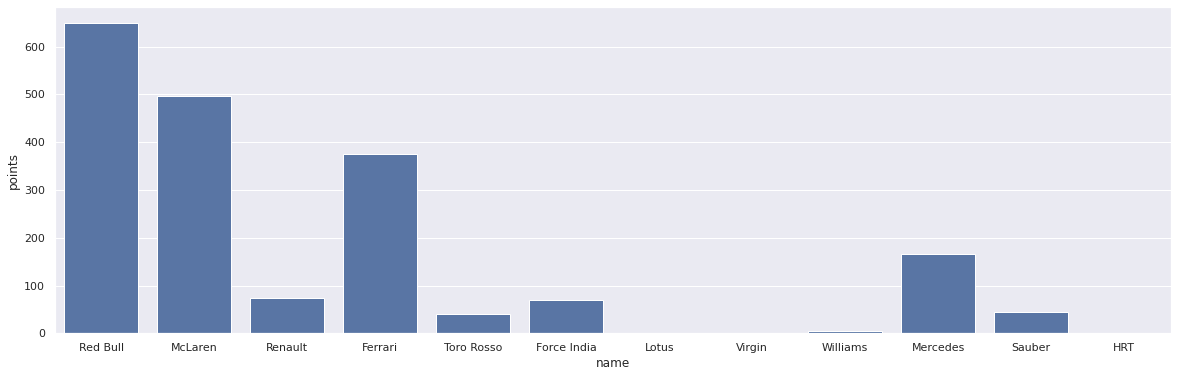

In [537]:
sns.barplot(x="name", y="points", data=constructorStandings_2011 ,label="Total", color="b")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

In [542]:
driverStandings_2011 = driverStandings.query("raceId == 859")
driverStandings_2011 = pd.merge(driverStandings_2011,drivers,on = "driverId",how='left')

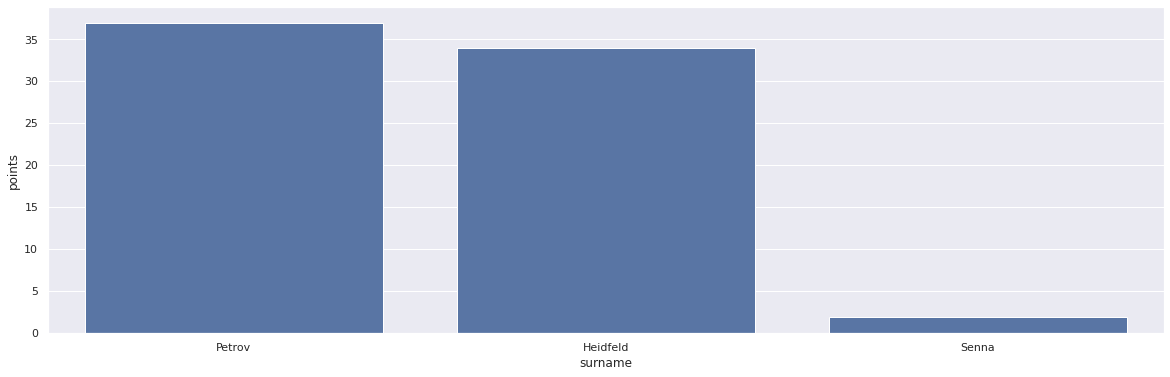

In [547]:
sns.barplot(x="surname", y="points", data=driverStandings_2011.query("surname == 'Petrov' or surname == 'Senna' or surname == 'Heidfeld'") ,label="Total", color="b")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

In [546]:
driverStandings_2011

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,64878,859,20,392.0,1,1,11,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,64879,859,1,227.0,5,5,3,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,64880,859,808,37.0,10,10,0,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov
3,64881,859,4,257.0,4,4,1,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,64882,859,17,258.0,3,3,1,webber,NaN,WEB,Mark,Webber,27/08/1976,Australian,http://en.wikipedia.org/wiki/Mark_Webber
5,64883,859,18,270.0,2,2,3,button,22.0,BUT,Jenson,Button,19/01/1980,British,http://en.wikipedia.org/wiki/Jenson_Button
6,64884,859,13,118.0,6,6,0,massa,19.0,MAS,Felipe,Massa,25/04/1981,Brazilian,http://en.wikipedia.org/wiki/Felipe_Massa
7,64885,859,67,15.0,15,15,0,buemi,NaN,BUE,SÌ©bastien,Buemi,31/10/1988,Swiss,http://en.wikipedia.org/wiki/S%C3%A9bastien_Buemi
8,64886,859,16,42.0,9,9,0,sutil,99.0,SUT,Adrian,Sutil,11/01/1983,German,http://en.wikipedia.org/wiki/Adrian_Sutil
9,64887,859,814,27.0,13,13,0,resta,NaN,DIR,Paul,di Resta,16/04/1986,British,http://en.wikipedia.org/wiki/Paul_di_Resta


## Les chiffres des pilotes

In [191]:
data = pd.merge(races_2011,lapTimes,on = "raceId",how='left')
data = pd.merge(data,drivers,on = "driverId",how='left')
data.head()

,raceId,year,round,circuitId,name,date,time_x,url_x,driverId,lap,...,time_y,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url_y
0,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,1,...,1:38.109,98109,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
1,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,2,...,1:33.006,93006,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
2,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,3,...,1:32.713,92713,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
3,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,4,...,1:32.803,92803,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,20,5,...,1:32.342,92342,vettel,5.0,VET,Sebastian,Vettel,03/07/1987,German,http://en.wikipedia.org/wiki/Sebastian_Vettel


In [219]:
data["seconds"] = data["milliseconds"]/1000
data["seconds"].head()

0    98.109
1    93.006
2    92.713
3    92.803
4    92.342
Name: seconds, dtype: float64

### Etude du grand prix de Chine de Petrov

In [300]:
petrov_chine = data.query('name == "Chinese Grand Prix" and driverRef == "petrov"')

In [301]:
petrov_chine.head()

,raceId,year,round,circuitId,name,date,time_x,url_x,driverId,lap,...,milliseconds,driverRef,number,code,forename,surname,dob,nationality,url_y,seconds
2779,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,1,...,113553,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,113.553
2780,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,2,...,106671,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,106.671
2781,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,3,...,106131,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,106.131
2782,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,4,...,106442,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,106.442
2783,843,2011,3,17,Chinese Grand Prix,2011-04-17,07:00:00,http://en.wikipedia.org/wiki/2011_Chinese_Gran...,808,5,...,105834,petrov,NaN,PET,Vitaly,Petrov,08/09/1984,Russian,http://en.wikipedia.org/wiki/Vitaly_Petrov,105.834


<AxesSubplot:xlabel='driverRef', ylabel='seconds'>

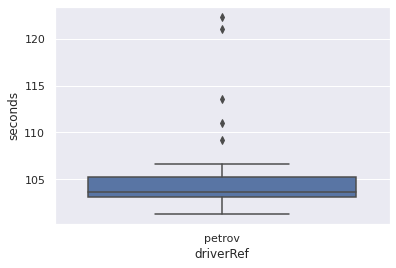

In [303]:
sns.boxplot(x="driverRef", y="seconds", data=petrov_chine)

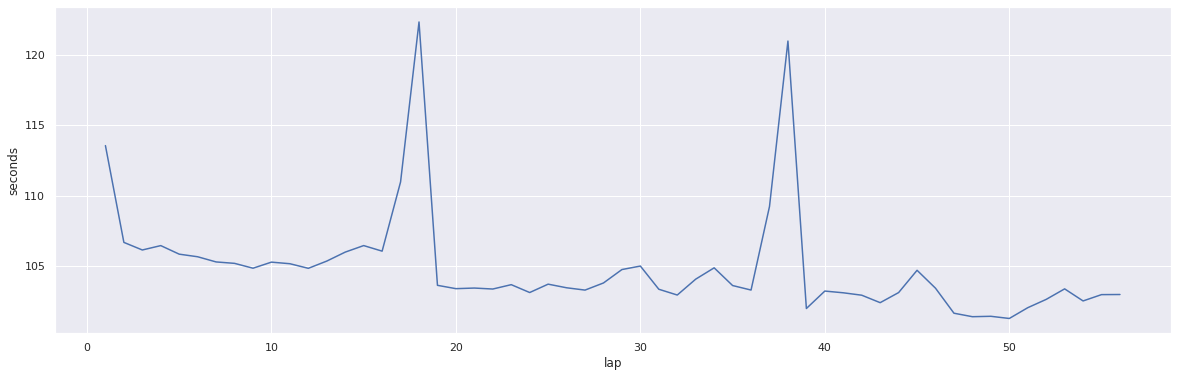

In [223]:
sns.lineplot(data=petrov_chine,x="lap",y="seconds")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

In [233]:
petrov_chine.query("seconds > 109")[["lap", "driverRef", "seconds"]]

,lap,driverRef,seconds
2779,1,petrov,113.553
2795,17,petrov,110.970
2796,18,petrov,122.344
2815,37,petrov,109.222
2816,38,petrov,120.987


In [256]:
ps0 = petrov_chine.query("lap < 17 and lap > 1")["seconds"].mean()
ps1 = petrov_chine.query("lap < 37 and lap > 18")["seconds"].mean()
ps2 = petrov_chine.query("lap > 38")["seconds"].mean()

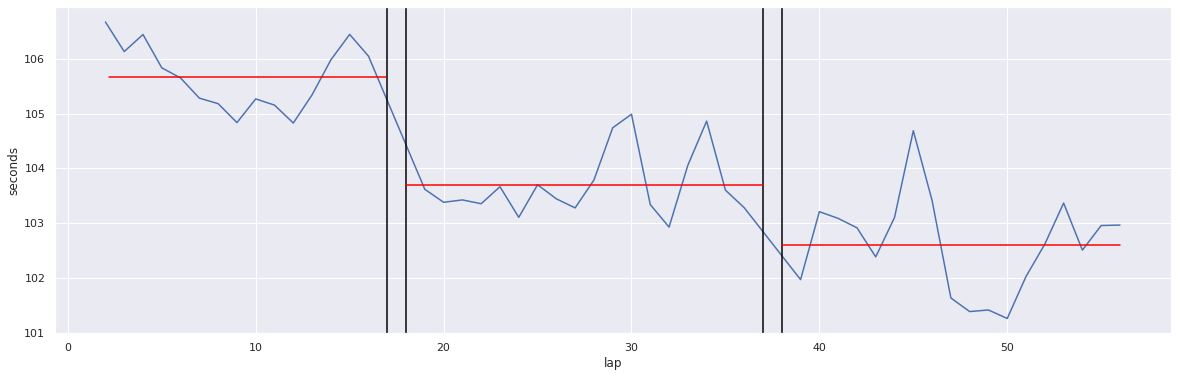

In [297]:
sns.lineplot(data=petrov_chine.query("seconds < 109"),x="lap",y="seconds")
fig = mp.pyplot.gcf()
plt.axvline(17, 0, 1, c='black')
plt.axvline(18, 0, 1, c='black')

plt.axvline(37, 0, 1, c='black')
plt.axvline(38, 0, 1, c='black')

plt.axhline(ps0, 0.049, 0.297, c='red')
plt.axhline(ps1, 0.315, 0.635, c='red')
plt.axhline(ps2, 0.652, 0.955, c='red')
fig.set_size_inches(20,6)

### Etude des écarts entre Petrov et Heidfeld dans le grand prix de Turquie 

In [496]:
petrov_timelap = data.query('name == "Turkish Grand Prix" and driverRef == "petrov"')
heidfeld_timelap = data.query('name == "Turkish Grand Prix" and driverRef == "heidfeld"')

In [497]:
petrov_timelap["cumtime"] = petrov_timelap["seconds"].cumsum()
heidfeld_timelap["cumtime"] = heidfeld_timelap["seconds"].cumsum()

<ipython-input-497-31095b3108a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petrov_timelap["cumtime"] = petrov_timelap["seconds"].cumsum()
<ipython-input-497-31095b3108a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heidfeld_timelap["cumtime"] = heidfeld_timelap["seconds"].cumsum()


In [498]:
timelap_turkish = pd.merge(heidfeld_timelap[["raceId","name","lap","driverRef","cumtime","seconds"]],petrov_timelap[["driverRef","cumtime","seconds","lap"]],on = "lap")
timelap_turkish.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       58 non-null     int64  
 1   name         58 non-null     object 
 2   lap          58 non-null     int64  
 3   driverRef_x  58 non-null     object 
 4   cumtime_x    58 non-null     float64
 5   seconds_x    58 non-null     float64
 6   driverRef_y  58 non-null     object 
 7   cumtime_y    58 non-null     float64
 8   seconds_y    58 non-null     float64
dtypes: float64(4), int64(2), object(3)
memory usage: 4.5+ KB


In [499]:
timelap_turkish["gap_petrov_heidfeld"] = timelap_turkish["cumtime_x"] - timelap_turkish["cumtime_y"]
timelap_turkish["delta_petrov_heidfeld"] = timelap_turkish["seconds_x"] - timelap_turkish["seconds_y"]
timelap_turkish.head()

,raceId,name,lap,driverRef_x,cumtime_x,seconds_x,driverRef_y,cumtime_y,seconds_y,gap_petrov_heidfeld,delta_petrov_heidfeld
0,844,Turkish Grand Prix,1,heidfeld,100.734,100.734,petrov,100.330,100.330,0.404,0.404
1,844,Turkish Grand Prix,2,heidfeld,197.897,97.163,petrov,197.636,97.306,0.261,-0.143
2,844,Turkish Grand Prix,3,heidfeld,294.160,96.263,petrov,293.084,95.448,1.076,0.815
3,844,Turkish Grand Prix,4,heidfeld,389.387,95.227,petrov,387.765,94.681,1.622,0.546
4,844,Turkish Grand Prix,5,heidfeld,484.738,95.351,petrov,482.642,94.877,2.096,0.474


<AxesSubplot:xlabel='name', ylabel='delta_petrov_heidfeld'>

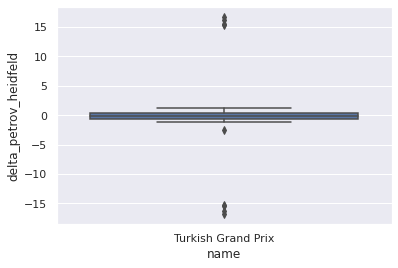

In [500]:
sns.boxplot(x="name", y="delta_petrov_heidfeld", data=timelap_turkish[["name","delta_petrov_heidfeld"]])

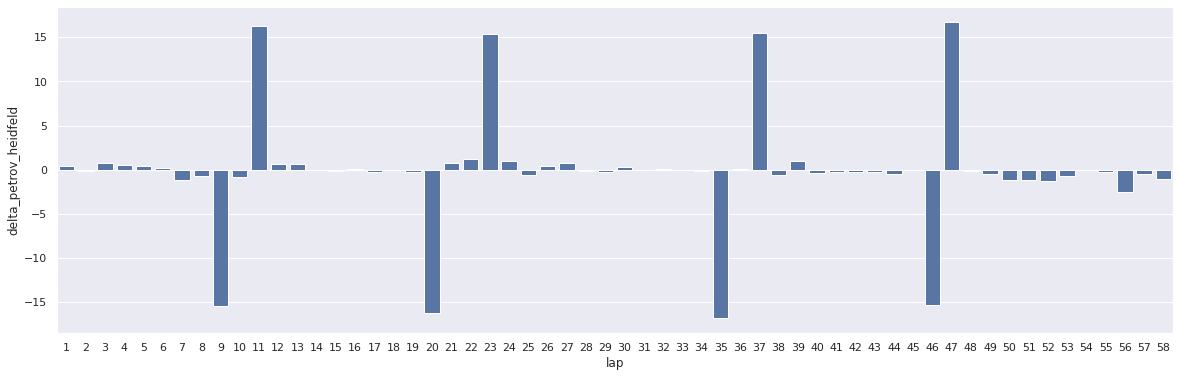

In [501]:
sns.barplot(x="lap", y="delta_petrov_heidfeld", data=timelap_turkish[["delta_petrov_heidfeld","lap"]],label="Total", color="b")
fig = mp.pyplot.gcf()
fig.set_size_inches(20,6)

In [502]:
timelap_turkish.query("delta_petrov_heidfeld < -2.5 or delta_petrov_heidfeld > 2.5 ")[["delta_petrov_heidfeld","lap"]]

,delta_petrov_heidfeld,lap
8,-15.475,9
10,16.258,11
19,-16.259,20
22,15.408,23
34,-16.868,35
36,15.491,37
45,-15.341,46
46,16.748,47
55,-2.534,56


<AxesSubplot:xlabel='name', ylabel='delta_petrov_heidfeld'>

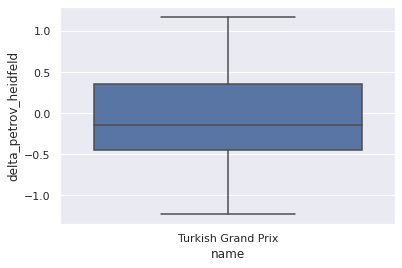

In [503]:
sns.boxplot(x="name", y="delta_petrov_heidfeld", data=timelap_turkish.query("delta_petrov_heidfeld > -2.5 and delta_petrov_heidfeld < 2.5 ")[["name","delta_petrov_heidfeld"]])

In [504]:
delta_turkish = timelap_turkish.query("delta_petrov_heidfeld > -2.5 and delta_petrov_heidfeld < 2.5 ")[["delta_petrov_heidfeld","lap"]]

In [505]:
ps0 = delta_turkish.query("lap < 9")["delta_petrov_heidfeld"].mean()
ps1 = delta_turkish.query("lap > 11 and lap < 20")["delta_petrov_heidfeld"].mean()
ps2 = delta_turkish.query("lap > 23 and lap < 35")["delta_petrov_heidfeld"].mean()
ps3 = delta_turkish.query("lap > 37 and lap < 47")["delta_petrov_heidfeld"].mean()
ps4 = delta_turkish.query("lap > 47")["delta_petrov_heidfeld"].mean()

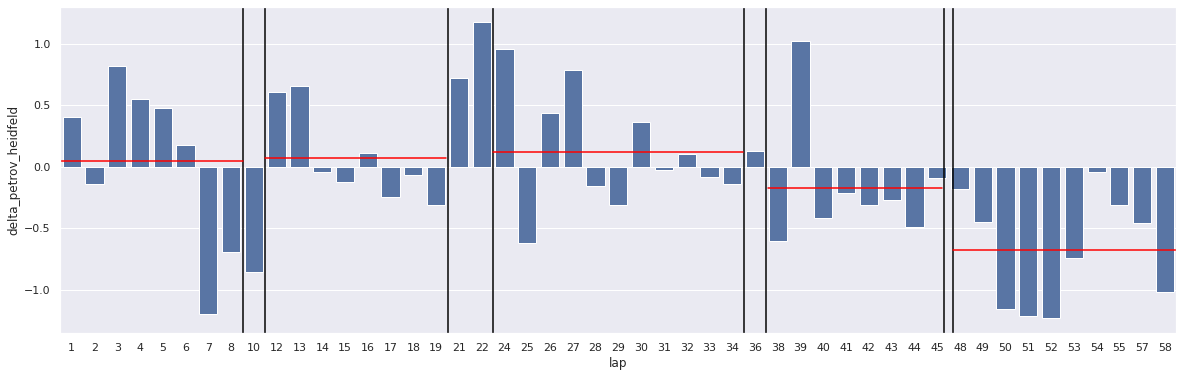

In [506]:
sns.barplot(x="lap", y="delta_petrov_heidfeld", data=delta_turkish,label="Total", color="b")
fig = mp.pyplot.gcf()

plt.axvline(7.5, 0, 1, c='black')
plt.axvline(8.5, 0, 1, c='black')

plt.axvline(16.5, 0, 1, c='black')
plt.axvline(18.5, 0, 1, c='black')

plt.axvline(29.5, 0, 1, c='black')
plt.axvline(30.5, 0, 1, c='black')

plt.axvline(38.3, 0, 1, c='black')
plt.axvline(38.7, 0, 1, c='black')

plt.axhline(ps0, 0, 0.164, c='red')
plt.axhline(ps1, 0.183, 0.346, c='red')
plt.axhline(ps2, 0.388, 0.612, c='red')
plt.axhline(ps3, 0.634, 0.79, c='red')
plt.axhline(ps4, 0.8, 1, c='red')

fig.set_size_inches(20,6)

In [507]:
delta_turkish = timelap_turkish.query("delta_petrov_heidfeld > -2.5 and delta_petrov_heidfeld < 2.5 ")[["name","delta_petrov_heidfeld"]]

In [511]:
delta_turkish["delta_petrov_heidfeld"].mean()

-0.09671428571428581

## Algorithme EM

### Mélange Gaussien

<AxesSubplot:>

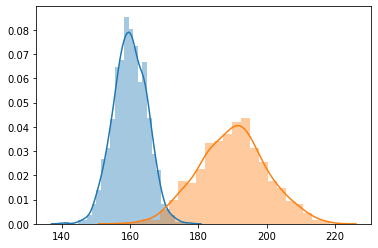

In [5]:
import numpy as np
import seaborn as sns

hommes = np.random.normal(190, 10, 1000)
# hommes = [171,171,173,180,190,159 ...]
femmes = np.random.normal(160,5, 1000)
# femmes = [145,170,145,161,139,150 ...]

sns.distplot(femmes, label="Femmes")
sns.distplot(hommes, label="Hommes")

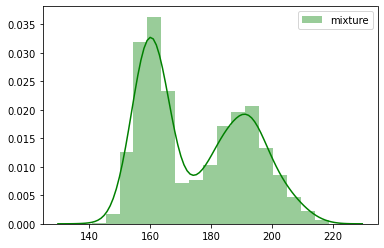

In [6]:
X  = np.concatenate((femmes,hommes))
sns.distplot(X, label="mixture", color="green")
plt.legend()

### Algorithme EM

KeyboardInterrupt: 

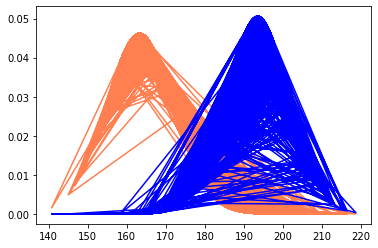

In [20]:
# Distribution des tailles X.. (voir plus haut )
# X      = [159,158, 159, 179, 189 ....]

# Générer un modèle aléatoire A 
A_mean = np.random.randint(100,300)
A_sd   = np.random.randint(10,30)

# Générer un modèle aléatoire B   
B_mean = np.random.randint(100,300)
B_sd   = np.random.randint(10,30)

# Faite 50 itérations... ( ca suffira)
for i in range(50):

    # Pour chaque valeur de X, calculer la probabilité 
    # sous l'hypothèse A et B
    p_A = scipy.stats.norm(loc=A_mean, scale=A_sd).pdf(X)
    p_B = scipy.stats.norm(loc=B_mean, scale=B_sd).pdf(X)

    
    # Calculer pour chaque valeur de X, un poids correspondant 
    # à son degrès d'appartenance à la loi A ou B.

    p_total  = p_A + p_B 
    weight_A = p_A / p_total
    weight_B = p_B / p_total

    # Exemple : Si la taille de 189cm appartient à la lois B 
    # alors weight_B(189) sera grand et weight_A(189) sera petit.

    #Ajustement des paramètres (μA,σA) et (μB,σB) en fonction du poids.

    A_mean = np.sum(X * weight_A )/ np.sum(weight_A)
    B_mean = np.sum(X * weight_B )/ np.sum(weight_B)

    A_sd   = np.sqrt(np.sum(weight_A * (X - A_mean)**2) / np.sum(weight_A))
    B_sd   = np.sqrt(np.sum(weight_B * (X - B_mean)**2) / np.sum(weight_B))
    plt.close()
    y = scipy.stats.norm.pdf(X,A_mean,A_sd)
    plt.plot(X,y, color='coral')
    y = scipy.stats.norm.pdf(X,B_mean,B_sd)
    plt.plot(X,y, color='blue')    

    # On recommence jusqu'à convergence. Non testé ici, je m'arrête à 50 iterations.